In [1]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

# Deskewing

(2339, 1654)


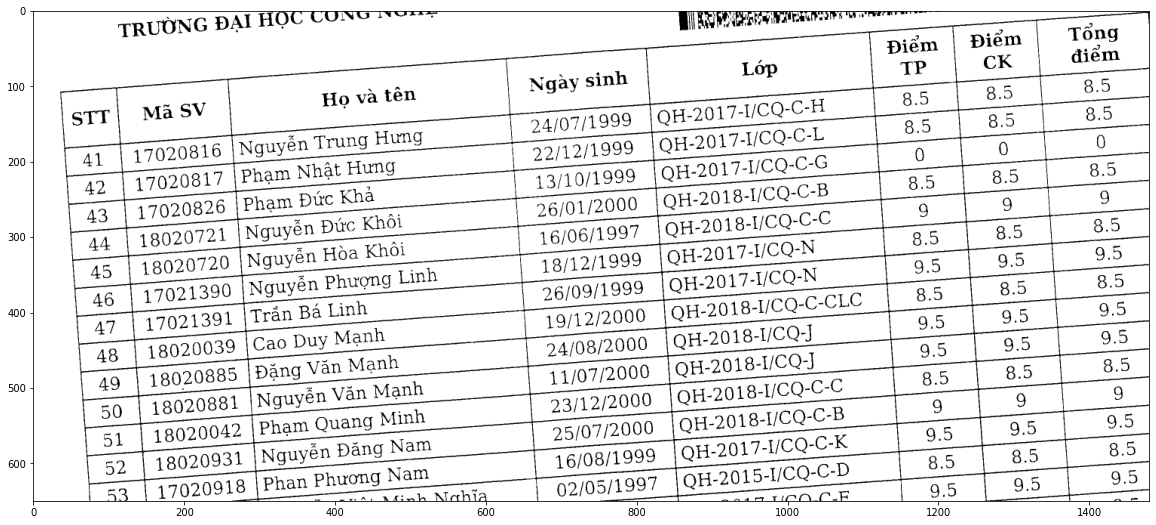

In [2]:
filename = '043435250121Phat trien ung dung di dong_INT3120 1.pdf'
images = convert_from_path('./data/sample/'+filename, grayscale=True, poppler_path='./poppler/Library/bin/')
img = np.array(images[1])
print(img.shape)
plt.imshow(img[250:900,120:1600], cmap='gray')

(thresh, img_bin) = cv2.threshold(img, 192, 255, cv2.THRESH_BINARY_INV)

In [3]:
cv2.imwrite('./data/sample/test.png',img_bin)

True

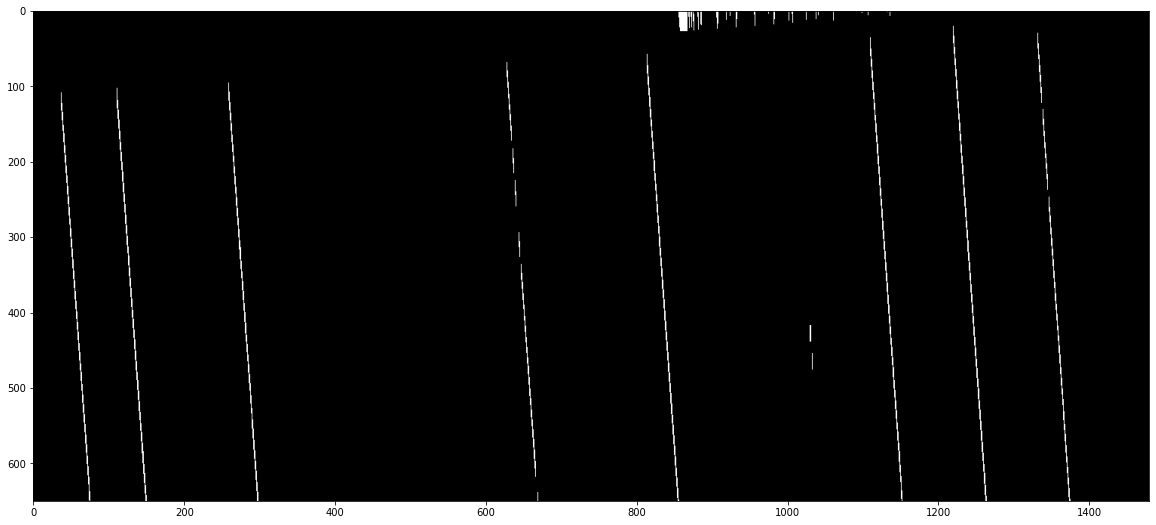

In [3]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))

# Morphological operation to detect vertical lines from an image
vertical_lines_img = cv2.erode(img_bin, vertical_kernel)
vertical_lines_img = cv2.dilate(vertical_lines_img, vertical_kernel)

cv2.imwrite('./data/sample/vert.png',vertical_lines_img)
plt.imshow(vertical_lines_img[250:900,120:1600], cmap='gray')

16
[[[ 1.242000e+03 -6.981318e-02]]

 [[ 1.353000e+03 -6.981318e-02]]

 [[ 1.463000e+03 -6.981318e-02]]

 [[ 9.460000e+02 -6.981318e-02]]

 [[ 7.600000e+02 -6.981318e-02]]

 [[ 3.900000e+02 -6.981318e-02]]

 [[ 2.430000e+02 -6.981318e-02]]

 [[ 1.670000e+02 -6.981318e-02]]

 [[ 1.690000e+02 -6.981318e-02]]

 [[ 1.610000e+02 -7.853982e-02]]

 [[ 2.370000e+02 -7.853982e-02]]

 [[ 3.820000e+02 -7.853982e-02]]

 [[ 1.650000e+02 -7.853982e-02]]

 [[ 9.420000e+02 -7.853982e-02]]

 [[ 9.380000e+02 -7.853982e-02]]

 [[ 7.530000e+02 -7.853982e-02]]]
Mean angle: -0.07363108


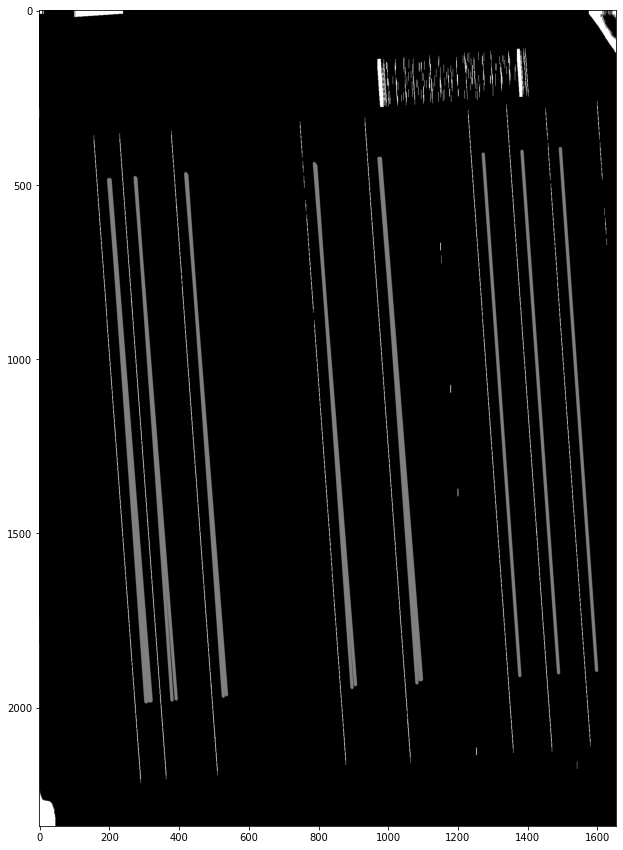

In [5]:
lines = cv2.HoughLines(vertical_lines_img[500:2000], 1, np.pi/360, 260, min_theta=-np.pi/12, max_theta=np.pi/12)

visual = vertical_lines_img.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho, theta = lines[i][0][0], lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 500*(-b)), int(y0 + 500*(a)))
        pt2 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
        cv2.line(visual, pt1, pt2, 128, 7, cv2.LINE_AA)
plt.imshow(visual, cmap='gray')

print(len(lines))
print(lines) #[[rho,theta]]
print('Mean angle:', np.mean(lines[:,:,1]))

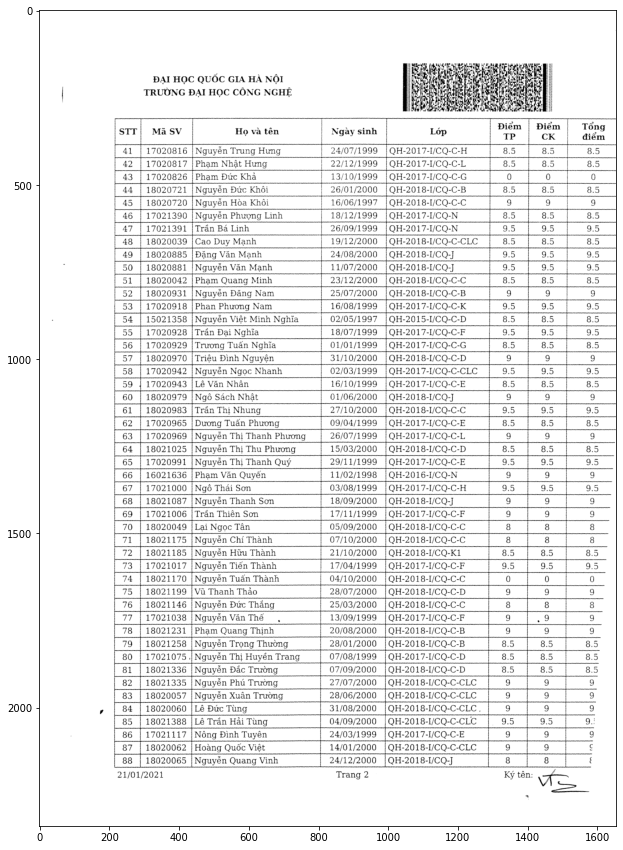

In [6]:
angle_degree = np.mean(lines[:,:,1])*180/np.pi
h, w = img.shape
center_point = (w//2, h//2)
rotated = cv2.warpAffine(img, cv2.getRotationMatrix2D(center_point, angle_degree, 1.0), (w, h), borderValue=255)
plt.imshow(rotated, cmap='gray')

# Pattern matching

(2339, 1654)


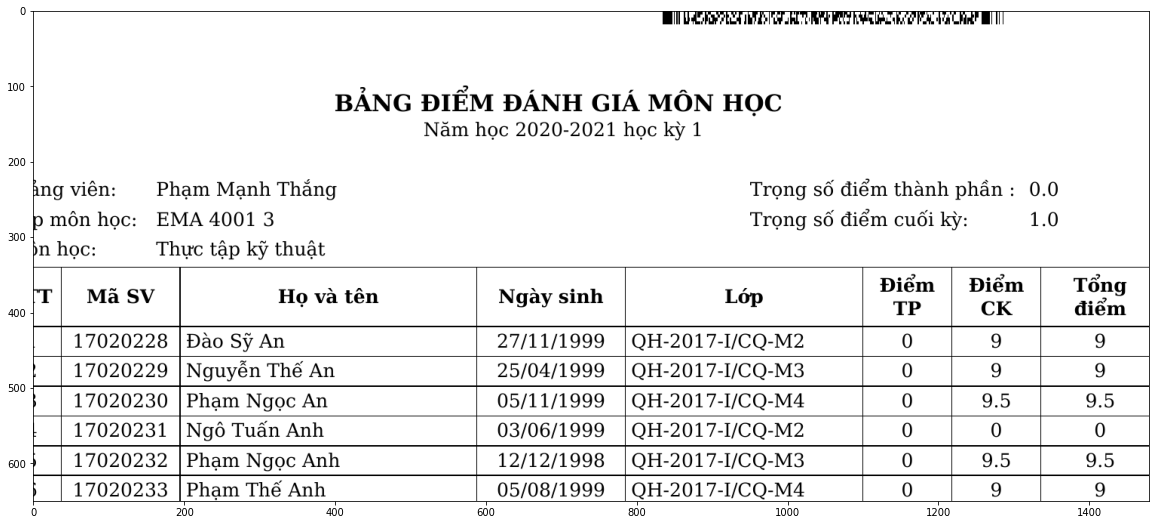

In [6]:
filename = '024746020221Final_BangDiem_ema_4001_3-1.pdf'
images = convert_from_path('./data/sample/'+filename, grayscale=True, poppler_path='./poppler/Library/bin/')
img = np.array(images[0])
print(img.shape)
plt.imshow(img[250:900,120:1600], cmap='gray')

(thresh, img_bin) = cv2.threshold(img, 192, 255, cv2.THRESH_BINARY_INV)

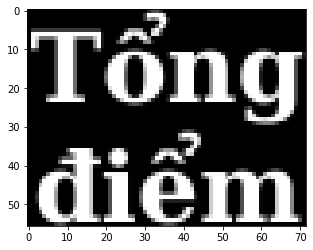

In [11]:
fig = plt.figure()
fig.set_size_inches(5,5)
plt.imshow(255-img[599:655,1499:1571], cmap='gray')

In [14]:
pattern = 255-img[599:655,1499:1571]  #shape h,w=56,72
cv2.imwrite('./data/pattern_tongdiem.png', pattern)

True

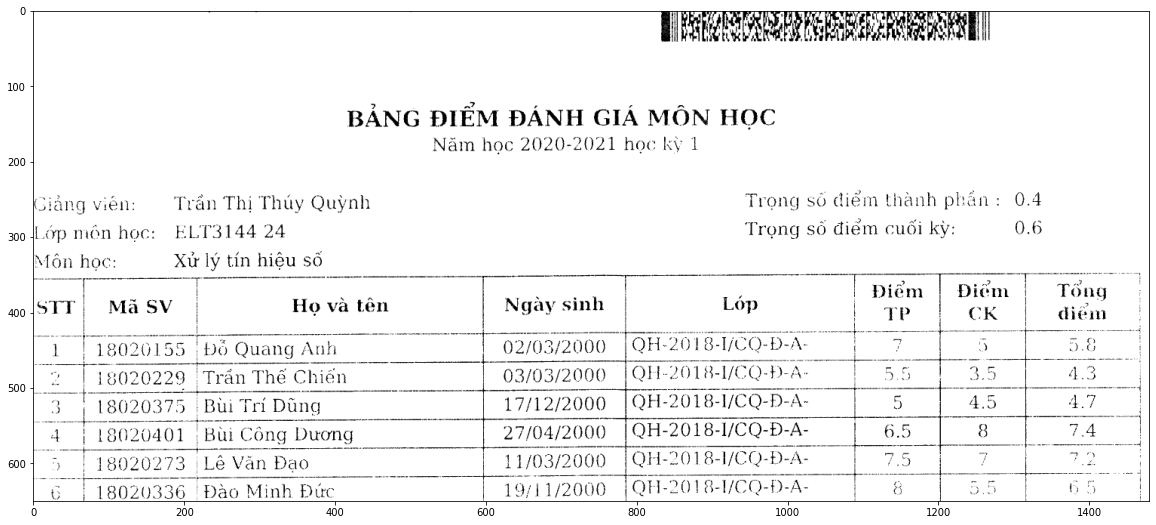

In [25]:
filename = '052042290121Xu ly tin hieu so_ELT3144 24.pdf'
images = convert_from_path('./data/sample/'+filename, grayscale=True, poppler_path='./poppler/Library/bin/')
img = np.array(images[0])
plt.imshow(img[250:900,120:1600], cmap='gray')

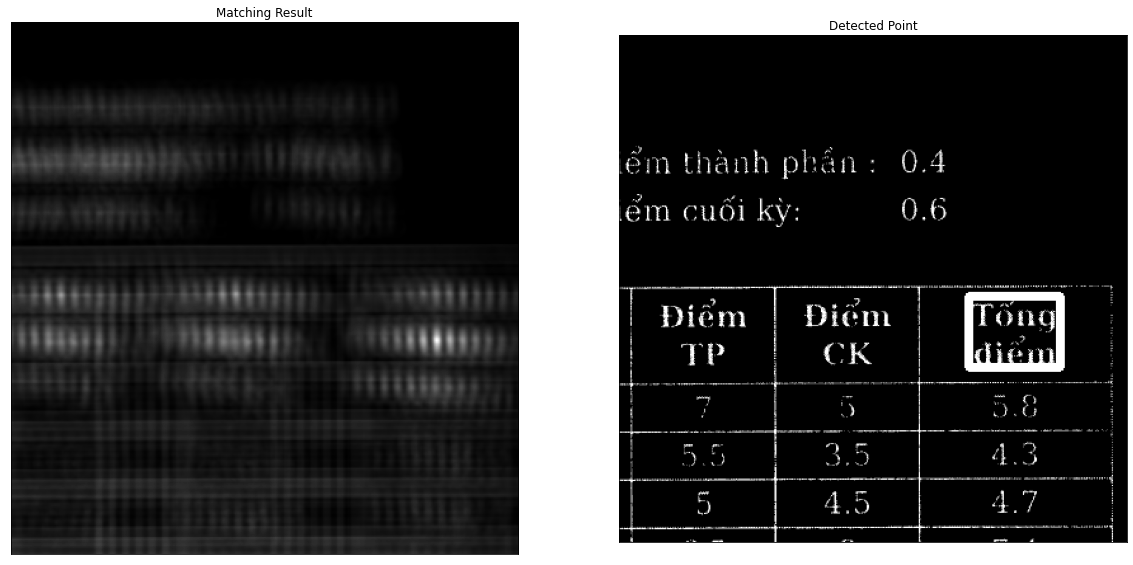

In [26]:
h, w = pattern.shape
#methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR']#, 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# looks like TM_CCORR is the best one
methods = ['cv2.TM_CCORR']

for meth in methods:
    img2 = 255-img[400:800,1200:1600].copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img2,pattern,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 5)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    #plt.suptitle(meth)
    plt.show()

# Read the column

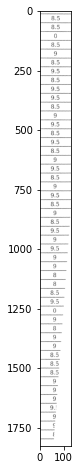

In [11]:
pattern = cv2.imread('./data/pattern_tongdiem.png', 0)

img2 = 255-rotated[300:600,1200:].copy()
res = cv2.matchTemplate(img2,pattern,cv2.TM_CCORR)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

x, y = max_loc
x, y = x+1200, y+300
x1, y1 = x-30, y+56
x2, y2 = x1+130, 2200
fig = plt.figure(); fig.set_size_inches(1,8)
plt.imshow(rotated[y1:y2,x1:x2], cmap='gray')

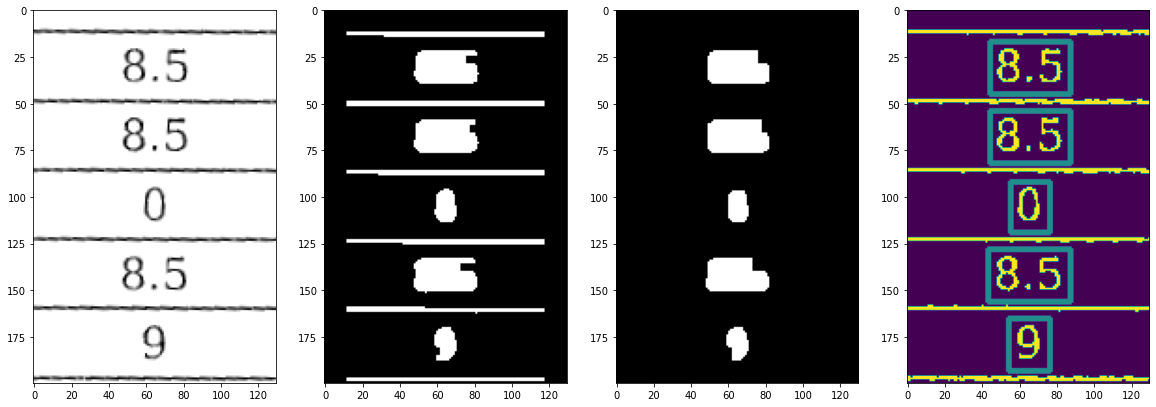

In [53]:
column = rotated[y1:y1+200,x1:x2]
(thresh, column_bin) = cv2.threshold(column, 192, 255, cv2.THRESH_BINARY_INV)

column_closed = cv2.morphologyEx(column_bin, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5)), borderValue=0)

column_opened = cv2.morphologyEx(column_closed, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))

contours, hierarchy = cv2.findContours(column_opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
visual_contours = column_bin.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    x, y, w, h = x-5, y-5, w+10, h+10
    cv2.rectangle(visual_contours, (x,y), (x+w,y+h), 127, 2)

plt.subplot(141),plt.imshow(column,cmap = 'gray')
plt.subplot(142),plt.imshow(column_closed,cmap = 'gray')
plt.subplot(143),plt.imshow(column_opened,cmap = 'gray')
plt.subplot(144),plt.imshow(visual_contours)
plt.show()

# OCR

In [80]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
config = "-l eng --oem 1 --psm 8 tessedit_char_whitelist=0123456789."

In [81]:
rois = [cv2.boundingRect(c) for c in contours]
grades = []
for x,y,w,h in rois:
    roi = column[y-5:y+h+5, x-5:x+w+5]
    text = pytesseract.image_to_string(roi, config=config)
    text = text[:-2] #exclude '\n\x0c'
    grade = float(text)
    grades.append(grade)
print(grades)

[9.0, 8.5, 0.0, 8.5, 8.5]
